<a href="https://colab.research.google.com/github/Ryan112435/colab/blob/main/5_29_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/content/drive/My Drive/txt'
wordlists = PlaintextCorpusReader(corpus_root, '.*') # .* => find all files, .txt => only find txt files
books = wordlists.fileids()
print(books)

['Brazil.txt', 'Europe.txt', 'Injustice.txt']


In [35]:
from nltk.corpus import brown


cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['racism', 'years', 'Germany']
cfd.tabulate(conditions=books, samples=findList)

               racism   years Germany 
   Brazil.txt       8       1       1 
   Europe.txt       0       3       3 
Injustice.txt       6       1       0 


Brazil.txt
Europe.txt
Injustice.txt


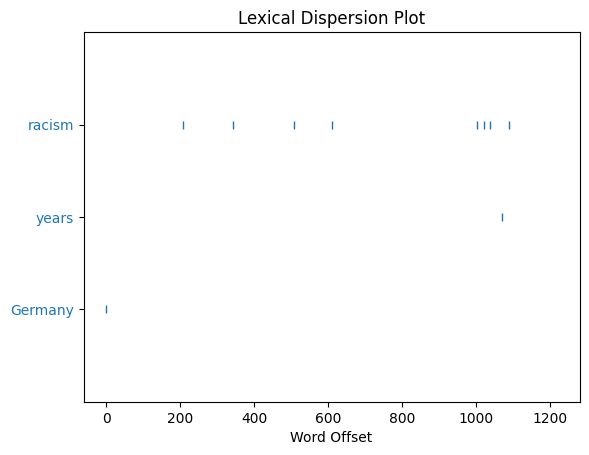

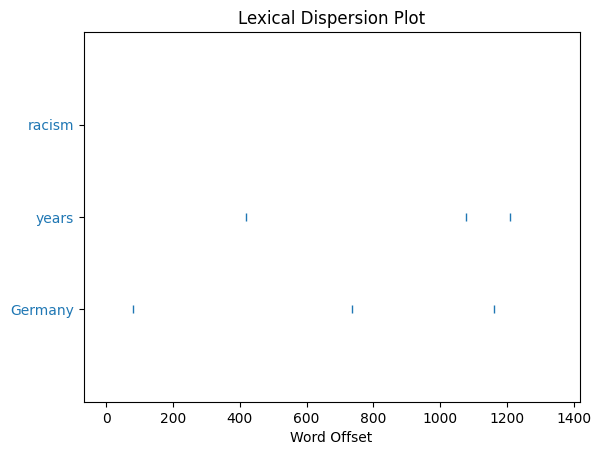

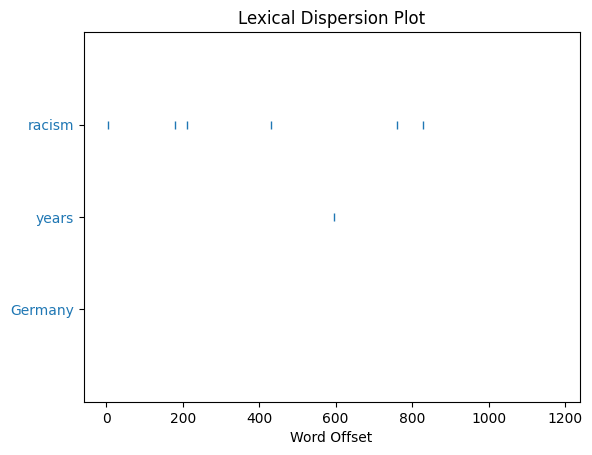

In [36]:
findList = ['racism', 'years', 'Germany' ]

for fileid in books:
   myWords = wordlists.words(fileid)
   myText = nltk.text.Text(myWords)
   print(fileid)
   myText.dispersion_plot(findList)

<Axes: xlabel='Samples', ylabel='Counts'>

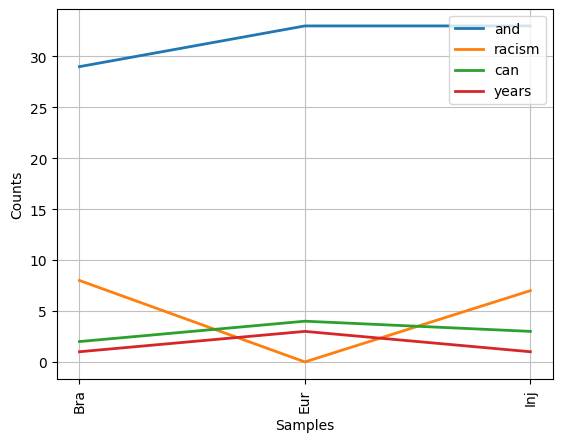

In [38]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:3])
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)

           for target in ['racism', 'years', 'and', 'can']
           if w.lower().startswith(target))
cfd.plot()